In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/maxwell.arff.csv")


In [3]:
dataset.head()

,SizeFP,Nlan,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,Effort
0,647,3,4,3,5,3,3,3,4,5,4,5,4,4,4,4,5,7871
1,130,3,2,3,3,3,3,3,2,2,4,3,4,4,4,4,4,845
2,254,2,3,3,2,3,3,4,2,3,4,5,4,3,2,3,3,2330
3,1056,3,2,2,4,2,2,1,3,5,4,4,5,4,3,2,3,21272
4,383,2,3,3,3,4,3,3,4,3,4,4,3,4,5,4,4,4224


In [4]:



max_corr_features =['SizeFP','Nlan','T01','T07','T08','T09','T10','T11','T15']

x = np.array(dataset[max_corr_features])
y = np.array(dataset['Effort'])

In [5]:
y.shape

(62,)

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(62,1))
y=scaler.fit_transform(y)

In [7]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=35) 

In [8]:
import xgboost as xgb
regr = xgb.XGBRegressor()
regr.fit(X_train,y_train.ravel())
y_pred=regr.predict(X_test)

In [9]:
y.shape

(62, 1)

In [10]:
y_pred=np.reshape(y_pred,(13,1))
y_test=np.reshape(y_test,(13,1))

In [11]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:
y_pred

array([[0.43858674],
       [0.10976096],
       [0.00250299],
       [0.03466588],
       [0.0233898 ],
       [0.0772068 ],
       [0.07817204],
       [0.00819163],
       [0.01303449],
       [0.01815511],
       [0.18679067],
       [0.12033027],
       [0.09874136]], dtype=float32)

In [13]:
y_test

array([[0.21259368],
       [0.05488742],
       [0.01029931],
       [0.00602114],
       [0.01857046],
       [0.04780466],
       [0.08245789],
       [0.04526945],
       [0.01692257],
       [0.06296842],
       [0.13534883],
       [0.01925179],
       [0.018412  ]])

In [14]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [15]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.006045030226511953

RMSE:
 0.07774979245317606

MAPE:
 155.82636453588933

SMAPE:
 81.77

 Adj R2 score:
 0.9999678334039337


In [16]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [17]:
y_test=np.reshape(y_test,(13,))
y_pred=np.reshape(y_pred,(13,))

In [18]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0         14000.0      28262.648438
1          4047.0       7510.124023
2          1233.0        740.966187
3           963.0       2770.798584
4          1755.0       2059.153809
5          3600.0       5455.598145
6          5787.0       5516.515625
7          3440.0       1099.981812
8          1651.0       1405.619385
9          4557.0       1728.787109
10         9125.0      12371.545898
11         1798.0       8177.164062
12         1745.0       6814.666016


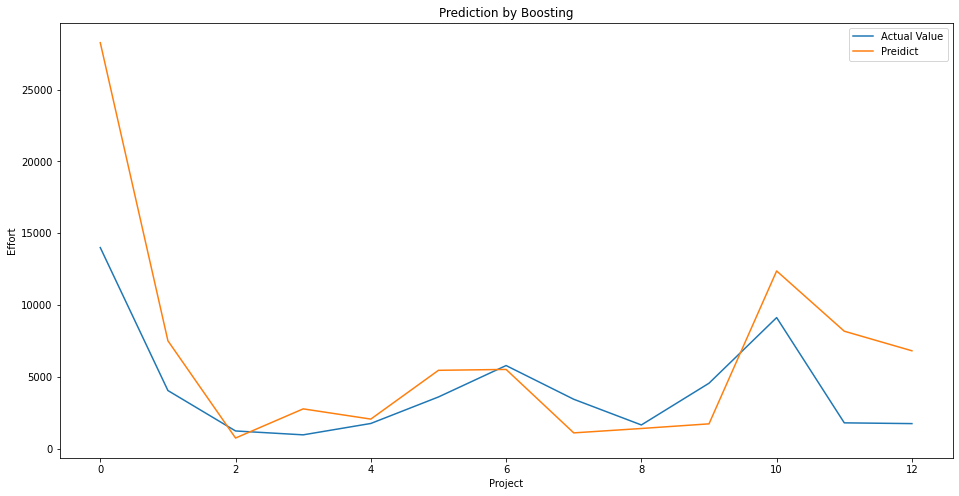

In [19]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Boosting")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()